In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("bi.csv", encoding="latin1")

# Part 1: Data Cleaning

## Check dataset structure

In [12]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [13]:
df.shape

(77, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


### Question: Which columns should be categorical and which should be numerical?
Categorical columns: fNAME, lNAME, gender, country, residence, prevEducation - 
Numerical columns: Age, entryEXAM, studyHOURS, Python, DB

## Detect inconsistent categories

In [17]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [18]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [19]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [20]:
df['gender'] = df['gender'].str.strip().str.title()
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})

df['country'] = df['country'].str.strip().str.title()
df['country'] = df['country'].replace({
    'Rsa': 'South Africa',
    'Norge': 'Norway',
    'Uk': 'UK'})

df['prevEducation'] = df['prevEducation'].str.strip().str.title()
df['prevEducation'] = df['prevEducation'].replace({
    'Barrrchelors': 'Bachelors',
    'Diplomaaa': 'Diploma',
    'Highschool': 'High School'})

## Handle duplicates

In [22]:
df.duplicated().sum()

0

In [23]:
df.drop_duplicates()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


# Part 2: Missing Data

## Identify missing values

In [26]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

### Question: Which columns are most affected by missing values?
Python: it has 2 missing values

## Impute missing values

In [29]:
# Numerical using mean
df['Python'] = df['Python'].fillna(df['Python'].mean())
df['DB'] = df['DB'].fillna(df['DB'].mean())

# Numerical using median
df['Python'] = df['Python'].fillna(df['Python'].median())
df['DB'] = df['DB'].fillna(df['DB'].median())

# Categorical 
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

### Task: Try both methods and compare results
Mean: Replaces NaN with average Python or DB score.

Median: Replaces NaN with middle Python or DB score.

Mode: Replaces missing categorical values with most common category.

In [31]:
print("After Mean:\n", df.isnull().sum())
print("\nAfter Median:\n", df.isnull().sum())
print("\nAfter Mode:\n", df.isnull().sum())

After Mean:
 fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

After Median:
 fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

After Mode:
 fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64


# Part 3: Outliers

## Detect outliers

### Question: Which values in studyHOURS, Python, or DB look unrealistic?

In [35]:
df['studyHOURS'].describe()

count     77.000000
mean     149.714286
std       12.743272
min      114.000000
25%      144.000000
50%      156.000000
75%      158.000000
max      160.000000
Name: studyHOURS, dtype: float64

In [36]:
df['Python'].describe()

count    77.000000
mean     75.853333
std      15.206208
min      15.000000
25%      72.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64

In [37]:
df['DB'].describe()

count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64

### From this we found that:
Study Hours
min = 114
max = 160
Studying 114–160 hours per week = 16–23 hours per day, this is  unrealistic

Python Scores
min = 15
max = 91
Range is 15–91, which is valid as scores should be between 0–100, So No unrealistic values here.

DB Scores
min = 30
max = 100
Range is 30–100, also validas as scores should be between 0–100, So No unrealistic values here.

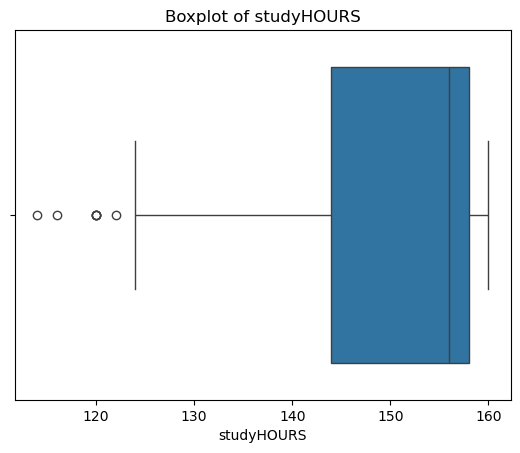

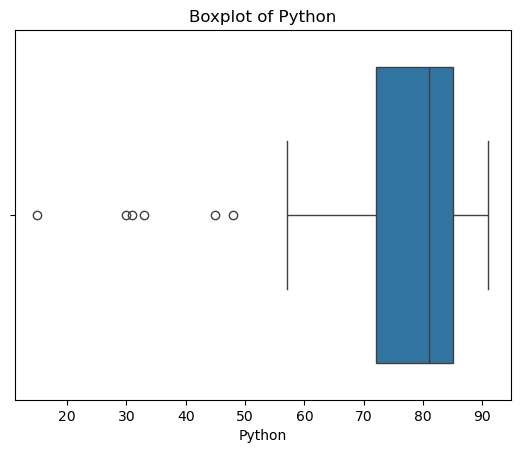

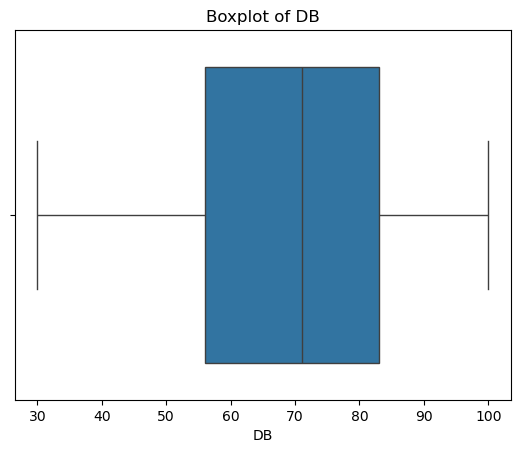

In [39]:
for col in ['studyHOURS', 'Python', 'DB']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Handle outliers

In [41]:
# Remove rows with scores outside 0–100
df_sample = df.copy()
df_sample = df_sample[(df_sample['Python'].between(0, 100)) & (df_sample['DB'].between(0, 100))]

df_sample.shape

(77, 11)

In [42]:
#  IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'studyHOURS')
df = remove_outliers_iqr(df, 'Python')
df = remove_outliers_iqr(df, 'DB')

In [43]:
df.shape

(64, 11)

In [44]:
#df.to_csv("cleaned_students.csv", index=False)

# Part 4: Feature Engineering

In [101]:
df['ProgrammingAvg'] = (df['Python'] + df['DB'] / 2)
df['isAdult'] = (df['Age'] >= 25).astype(int)

def categorize_studyhours(x):
    if x <= 10:
        return "Low"
    elif x<=30:
        return "Medium"
    else:
        return "High"
df['studyHOURS_cat'] = df['studyHOURS'].apply(categorize_studyhours)
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,ProgrammingAvg,isAdult,studyHOURS_cat
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,99.0,1,High
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.0,59,117.5,1,High
6,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91,125.5,1,High
7,Lars,Olsen,29,Male,Norway,BIResidence,89,Bachelors,160,85.0,60,115.0,1,High
8,Bjørn,Larsen,31,Male,Norway,BI Residence,88,Bachelors,156,80.0,89,124.5,1,High


## Question: Which engineered feature do you think would add the most predictive power to the model?
#### ProgrammingAvg would add the most predictive power to the model, because it combines betweem Python & DB scores.

# Part 5: Feature Scaling

## Detect numeric columns

In [109]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB', 'ProgrammingAvg'], dtype='object')

## Apply Scaling

### Option 1: StandardScaler (mean=0, std=1)

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,ProgrammingAvg,isAdult,studyHOURS_cat
2,Philip,Leo,-1.135224,Male,Uganda,Sognsvann,-2.115336,High School,-3.309518,-1.042043,-1.333821,-1.427328,1,High
5,Hannah,Hansen,-1.135224,Female,Norway,BI Residence,-1.227324,High School,-3.309518,1.066264,-0.783476,0.053981,1,High
6,Ole,Johansen,-0.914725,Male,Norway,BI-Residence,0.710158,Bachelors,0.289853,-0.138483,1.173304,0.694547,1,High
7,Lars,Olsen,-0.694226,Male,Norway,BIResidence,0.629429,Bachelors,0.843603,0.614484,-0.722327,-0.146196,1,High
8,Bjørn,Larsen,-0.473728,Male,Norway,BI Residence,0.548701,Bachelors,0.289853,-0.138483,1.051005,0.614476,1,High


### Option 2: MinMaxScaler (range 0–1)

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,ProgrammingAvg,isAdult,studyHOURS_cat
2,Philip,Leo,0.083333,Male,Uganda,Sognsvann,0.317460,High School,0.000000,0.448276,0.253731,0.264706,1,High
5,Hannah,Hansen,0.083333,Female,Norway,BI Residence,0.492063,High School,0.000000,0.931034,0.388060,0.627451,1,High
6,Ole,Johansen,0.125000,Male,Norway,BI-Residence,0.873016,Bachelors,0.866667,0.655172,0.865672,0.784314,1,High
7,Lars,Olsen,0.166667,Male,Norway,BIResidence,0.857143,Bachelors,1.000000,0.827586,0.402985,0.578431,1,High
8,Bjørn,Larsen,0.208333,Male,Norway,BI Residence,0.841270,Bachelors,0.866667,0.655172,0.835821,0.764706,1,High


# Part 6: Encoding Categorical Data

In [135]:
# Detect categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['fNAME', 'lNAME', 'gender', 'country', 'residence', 'prevEducation',
       'studyHOURS_cat'],
      dtype='object')

In [137]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
df_encoded.head()

,Age,entryEXAM,studyHOURS,Python,DB,ProgrammingAvg,isAdult,fNAME_Anna,fNAME_Bjørn,fNAME_Camilla,...,country_Uganda,residence_BI-Residence,residence_BIResidence,residence_BI_Residence,residence_Private,residence_Sognsvann,prevEducation_Diploma,prevEducation_Doctorate,prevEducation_High School,prevEducation_Masters
2,0.083333,0.317460,0.000000,0.448276,0.253731,0.264706,1,False,False,False,...,True,False,False,False,False,True,False,False,True,False
5,0.083333,0.492063,0.000000,0.931034,0.388060,0.627451,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,0.125000,0.873016,0.866667,0.655172,0.865672,0.784314,1,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,0.166667,0.857143,1.000000,0.827586,0.402985,0.578431,1,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,0.208333,0.841270,0.866667,0.655172,0.835821,0.764706,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:
df.to_csv("cleaned_students.csv", index=False)